In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy 


In [4]:
file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/Hexgrid_test/Hexgrid_std01_Hatteras_001.zarr"

In [5]:
pset = xr.open_zarr(file_path)

In [6]:
pset

<xarray.Dataset> Size: 5GB
Dimensions:     (trajectory: 1068500, obs: 95)
Coordinates:
  * obs         (obs) int32 380B 0 1 2 3 4 5 6 7 8 ... 87 88 89 90 91 92 93 94
  * trajectory  (trajectory) int64 9MB 4274000 4274001 ... 5342498 5342499
Data variables:
    hexbin_id   (trajectory, obs) float32 406MB dask.array<chunksize=(1068500, 1), meta=np.ndarray>
    lat         (trajectory, obs) float64 812MB dask.array<chunksize=(1068500, 1), meta=np.ndarray>
    lon         (trajectory, obs) float64 812MB dask.array<chunksize=(1068500, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 812MB dask.array<chunksize=(1068500, 1), meta=np.ndarray>
    u           (trajectory, obs) float32 406MB dask.array<chunksize=(1068500, 1), meta=np.ndarray>
    v           (trajectory, obs) float32 406MB dask.array<chunksize=(1068500, 1), meta=np.ndarray>
    w           (trajectory, obs) float32 406MB dask.array<chunksize=(1068500, 1), meta=np.ndarray>
    z           (trajectory, obs) float64 812MB dask.array<chunksize=(1068500, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DKeepInOceanSampleF...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

In [7]:
365*6

2190

In [8]:
mask_file = '/storage/shared/oceanparcels/input_data/NEMO_Ensemble/GRID/NATL025-CJMenobs01_byte_mask.nc'
mask = xr.open_dataset(mask_file, decode_times=False)

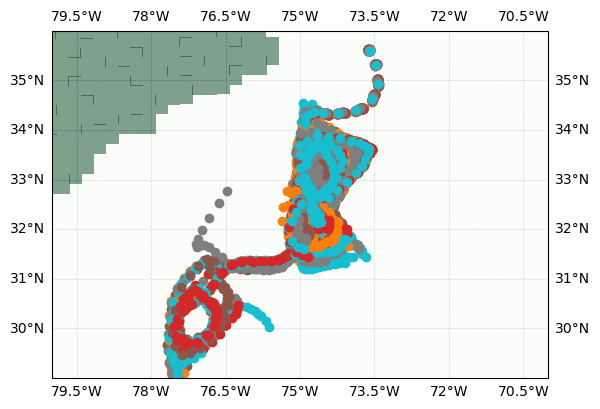

In [22]:
# Plot NA_domain on a map
depth = 0
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-80, -70, 29, 36], crs=cartopy.crs.PlateCarree())
# ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)
# hexfunc.pcolorhex(ax, grid_raw, colors='r', draw_edges=True, fill_polygons=False)
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='Greens_r', alpha=0.5)
for i in range(100):
    ax.scatter(pset.lon[i,0], pset.lat[i,0])
    ax.scatter(pset.lon[i,:], pset.lat[i,:])

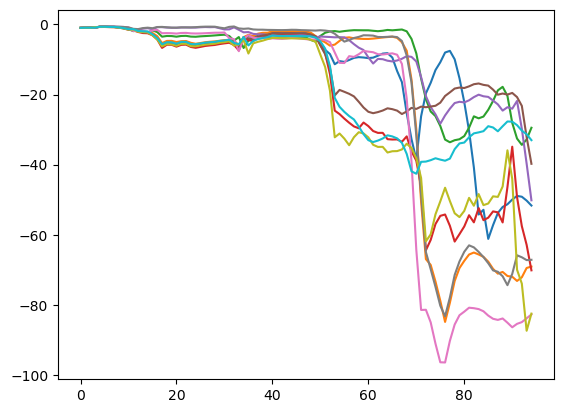

In [23]:
for i in range(10):
    plt.plot(-pset.z[i,:])